<a href="https://colab.research.google.com/github/jaswantcoder/Tweets-sentiment-detection/blob/main/preprocessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd 
import matplotlib.pyplot as plt
# libraries for dataset preparation, feature engineering, model training 
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import decomposition, ensemble
from textblob import TextBlob as tb
import pandas, xgboost, numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#nltk.download('punkt')
from html.parser import HTMLParser
import re
import sys
import nltk
import numpy as np
# import pandas lib as pd 
import pandas as pd 
import re
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import data into dataframes

In [ ]:
# append first file of depression related tweets
#creating dataframe

search_words = ["glad","joy","new","welcome","congrats","depressed","sad","alone","stressed","upset"];

nondep = {"glad","joy","new","welcome","congrats"}
dep = {"depressed","sad","alone","stressed","upset"}


date = ["_18","_19","_20","_21","_22"]
suff = "0421"

traindf = pd.DataFrame(columns = ['id', 'text', 'keyword','label'])

for key in search_words:
  strr = key
  for dt in date:
    path = "/content/drive/MyDrive/finalyearproject/tweets/"+strr+dt+suff+".csv"
    df = pd.read_csv(path)
    tempdf =pd.DataFrame()
    tempdf['id'] = df.iloc[:,1]
    #tempdf['user'] = df.iloc[:,2]
    tempdf['text'] = df.iloc[:,0]
    tempdf['keyword'] = pd.Series([key for x in range(len(df.index))])
 
    if(key in dep):
      label = 1
    else:
        label =0

    tempdf['label'] = pd.Series([label for x in range(len(df.index))])

    traindf = traindf.append(tempdf, ignore_index=True)





In [ ]:
traindf.count()

id         247185
text       247185
keyword    247185
label      247185
dtype: int64

In [ ]:
traindf.id.nunique(dropna=True)

246518

# Preprocess data

In [ ]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')

def get_negations_pattern():
    negations_ = {"isn't": "is not", "can't": "can not", "couldn't": "could not", "hasn't": "has not",
                  "hadn't": "had not", "won't": "will not",
                  "wouldn't": "would not", "aren't": "are not",
                  "haven't": "have not", "doesn't": "does not", "didn't": "did not",
                  "don't": "do not", "shouldn't": "should not", "wasn't": "was not", "weren't": "were not",
                  "mightn't": "might not",
                  "mustn't": "must not"}
    return re.compile(r'\b(' + '|'.join(negations_.keys()) + r')\b')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .lowercase() \
            .handle_negations() \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers() 


    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self
        print(5)

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self
        print(6)

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
          return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):

        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        words = self.text
        self.text = ' '.join(s for s in words.split() if not any(c.isdigit() for c in s))
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self
    
    def handle_negations(self):  
        self.text = re.sub(pattern=get_negations_pattern(), repl='', string=self.text)
        return self

IndentationError: ignored

In [ ]:

import re
import sys
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

In [ ]:
def preprocess(tweet):
  obj = TwitterPreprocessor(tweet)
  obj.fully_preprocess()
  return obj.text

new_df=traindf.copy()
new_df['text'] = new_df['text'].apply(preprocess)

In [ ]:
traindf.head()

,id,text,keyword,label
0,1383656778798227459,b'Ain\xe2\x80\x99t you kinda glad and ain\xe2\...,glad,0
1,1383656778529865729,b'i\xe2\x80\x99m glad i don\xe2\x80\x99t bring...,glad,0
2,1383656774322978818,b'@mmmfeelsgood Im so glad im not the only one',glad,0
3,1383656772531937291,b'RT @imabihh: I\xe2\x80\x99m so glad I don\xe...,glad,0
4,1383656771932147712,"b""RT @KingRexy328: It still saddens me that we...",glad,0


In [ ]:
new_df.head()

,id,text,keyword,label
0,1383656778798227459,kinda glad kinda gay hear say ily,glad,0
1,1383656778529865729,glad bring drama personal problems twitter,glad,0
2,1383656774322978818,im glad im one,glad,0
3,1383656772531937291,glad pretend black,glad,0
4,1383656771932147712,still saddens almost got godzilla movie goji d...,glad,0


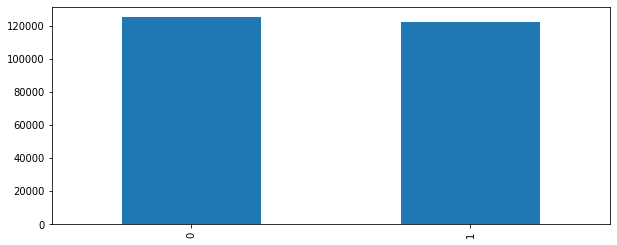

In [ ]:
my_label = ['0','1']
plt.figure(figsize=(10,4))
traindf.label.value_counts().plot(kind='bar');

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

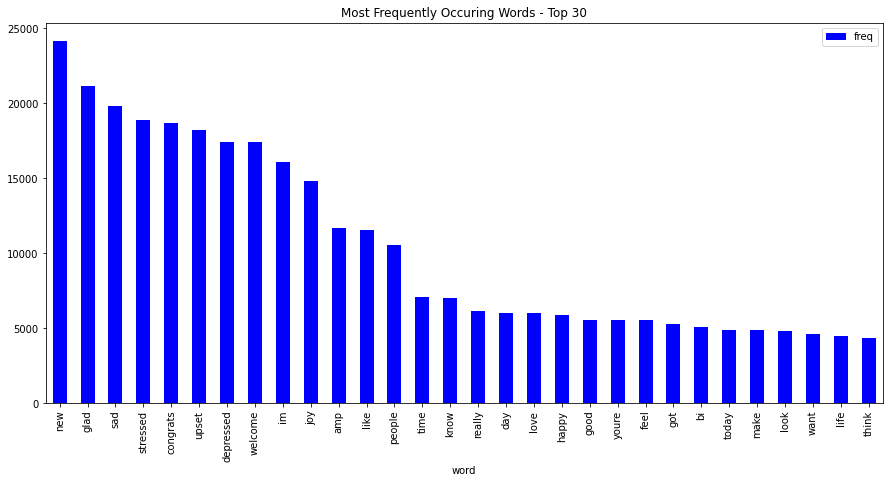

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new_df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


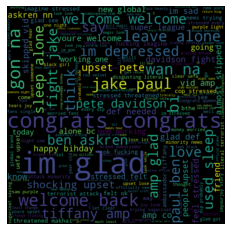

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
#wordcloud2 = WordCloud().generate(' '.join(text2['Crime Type']))

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(' '.join( rev for rev in new_df.text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
def CleanTokenize(df):
    head_lines = list()
    lines = df["text"].values.tolist()

    for line in lines:
        #line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

(-0.5, 999.5, 499.5, -0.5)

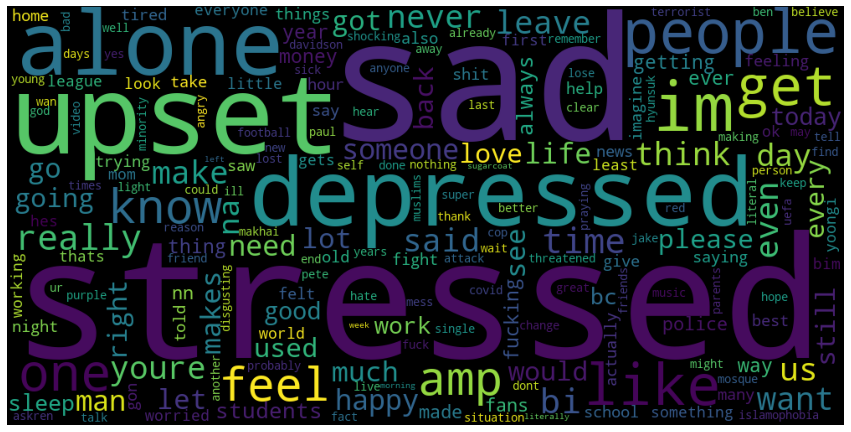

In [ ]:
 from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = new_df.loc[new_df['label'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

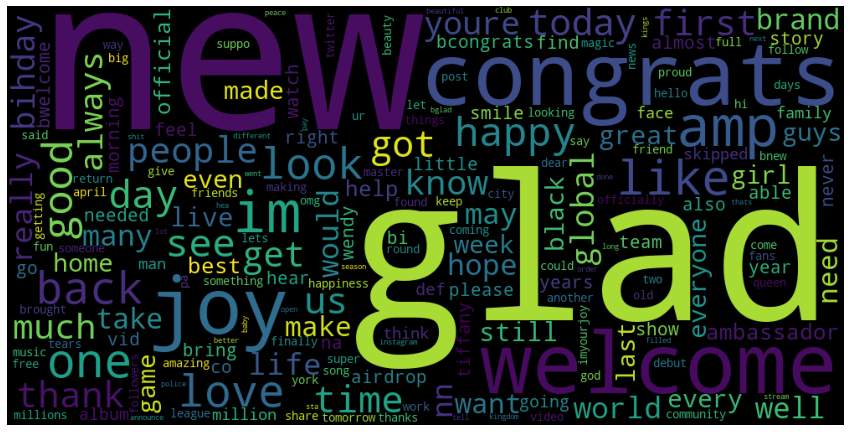

In [ ]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = new_df.loc[new_df['label'] == 0]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

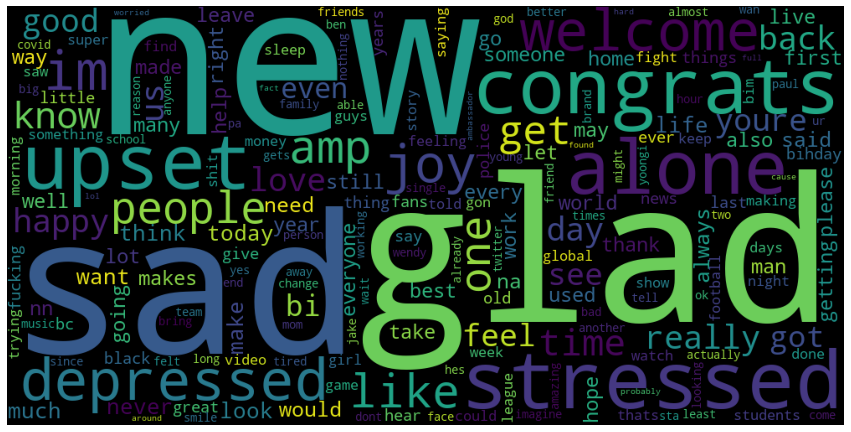

In [ ]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = new_df
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:

freqdf = new_df.copy()
freqdf = freqdf.loc[freqdf['label']==1]
freqdf.head()

,id,text,keyword,label
124928,1383609845488570373,difficulty something instead moaning getting d...,depressed,1
124929,1383609833417441285,im depressed evidence wb sitting gold mine cin...,depressed,1
124930,1383609821803417614,never suppoed made depressed amp sleeping floo...,depressed,1
124931,1383609775531827204,guys know order play role insane mentally depr...,depressed,1
124932,1383609741037891596,exams canceled except ssc chsl expecting us gi...,depressed,1


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

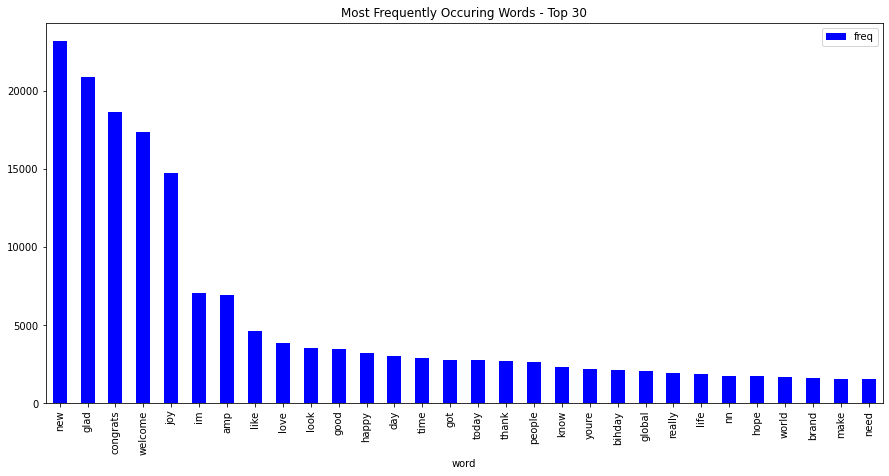

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

freqdf = new_df.copy()
freqdf = freqdf.loc[freqdf['label']==0]

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(freqdf.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

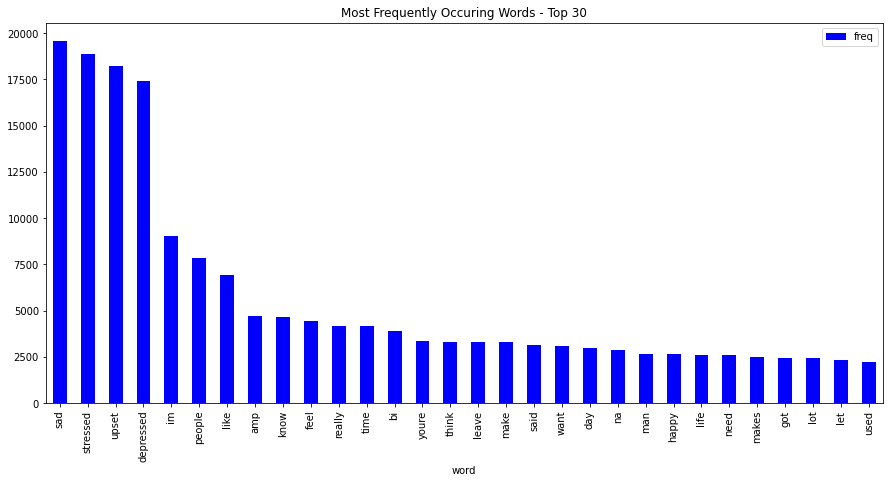

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

freqdf = new_df.copy()
freqdf = freqdf.loc[freqdf['label']==1]

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(freqdf.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


(-0.5, 999.5, 499.5, -0.5)

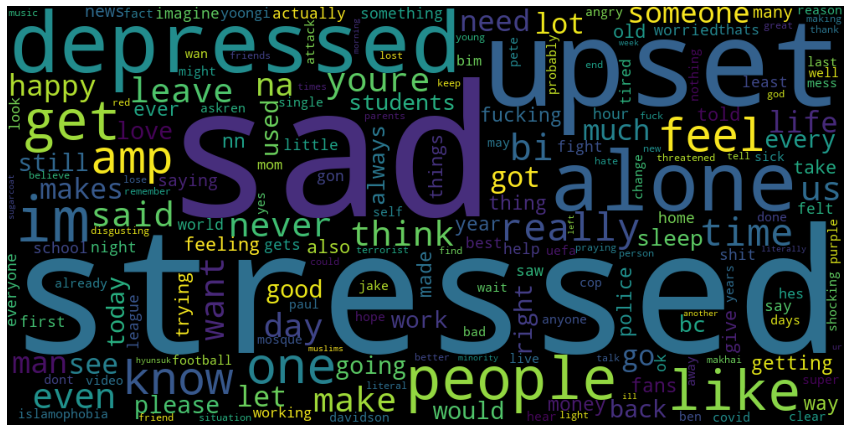

In [ ]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = freqdf.copy()
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

# **Sentiment Analysis:**

> We are performing sentiment analysis using textblob




In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk

!pip install pycountry
import pycountry


In [ ]:
!pip install langdetect
import langdetect

In [ ]:

import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

### Copy the dataframe with selected column


In [ ]:
# copy the dataframe with selected columns
selected_columns = new_df[["text","keyword","label"]]
tw_list = selected_columns.copy()
tw_list.head()

,text,keyword,label
0,kinda glad kinda gay hear say ily,glad,0
1,glad bring drama personal problems twitter,glad,0
2,im glad im one,glad,0
3,glad pretend black,glad,0
4,still saddens almost got godzilla movie goji d...,glad,0


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,122700,49.64
negative,92472,37.41
neutral,32013,12.95


In [ ]:
#tw_list.to_csv('/content/drive/MyDrive/finalyearproject/tweets/datasetwithsentiment.csv', header=False, index=False)

In [ ]:
#tw_list.to_csv(r'/content/drive/MyDrive/finalyearproject/tweets/datasetwithsentiment3.csv')

In [ ]:
tw_list.head()

,text,keyword,label,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,kinda glad kinda gay hear say ily,glad,0,0.458333,0.791667,positive,0.000,0.413,0.587,0.7968
1,glad bring drama personal problems twitter,glad,0,0.250000,0.650000,positive,0.278,0.412,0.309,0.0772
2,im glad im one,glad,0,0.500000,1.000000,positive,0.000,0.500,0.500,0.4588
3,glad pretend black,glad,0,0.166667,0.716667,positive,0.259,0.185,0.556,0.3818
4,still saddens almost got godzilla movie goji d...,glad,0,0.200000,0.200000,negative,0.209,0.791,0.000,-0.4404


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_nondep_neg = tw_list[tw_list["sentiment"]=="negative"]
tw_list_nondep_neg = tw_list_nondep_neg[tw_list_nondep_neg["label"]==0]
tw_list_nondep_pos = tw_list[((tw_list["sentiment"]=="positive") ) & (tw_list["label"]==0)]
tw_list_nondep_neu = tw_list[(tw_list["sentiment"]=="neutral") & (tw_list["label"]==0)]
tw_list_dep_neg = tw_list[(tw_list["sentiment"]=="negative") & (tw_list["label"]==1)]
tw_list_dep_pos = tw_list[(tw_list["sentiment"]=="negative") & (tw_list["label"]==1)]
tw_list_dep_neu = tw_list[(tw_list["sentiment"]=="negative") & (tw_list["label"]==1)]


tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
tw_list.head()

,text,keyword,label,polarity,subjectivity,sentiment,neg,neu,pos,compound,id
0,kinda glad kinda gay hear say ily,glad,0,0.458333,0.791667,positive,0.000,0.413,0.587,0.7968,1383656778798227459
1,glad bring drama personal problems twitter,glad,0,0.250000,0.650000,positive,0.278,0.412,0.309,0.0772,1383656778529865729
2,im glad im one,glad,0,0.500000,1.000000,positive,0.000,0.500,0.500,0.4588,1383656774322978818
3,glad pretend black,glad,0,0.166667,0.716667,positive,0.259,0.185,0.556,0.3818,1383656772531937291
4,still saddens almost got godzilla movie goji d...,glad,0,0.200000,0.200000,negative,0.209,0.791,0.000,-0.4404,1383656771932147712


In [ ]:
#different dataframes for positive, negative and neutral sentiment tweets

tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]



In [ ]:
def count_label_sentiment(tot,posdata,negdata,neudata):
 total = tot.loc[:,"label"].value_counts(dropna=False)
 positive = posdata.loc[:,"label"].value_counts(dropna=False)
 negative = negdata.loc[:,"label"].value_counts(dropna=False)
 neutral = neudata.loc[:,"label"].value_counts(dropna=False)
 #positive = 
 #percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,positive,negative,neutral],axis=1,keys=['tot','positive','negative','neutral'])
#Count_values for sentiment
count_label_sentiment(tw_list,tw_list_positive,tw_list_negative,tw_list_neutral)

,tot,positive,negative,neutral
0,124928,90488,11912,22528
1,122257,32212,80560,9485


In [ ]:
#tw_list['polarity'] = ["depressive" if x ==1 else "nondepressive" for x in tw_list['label']]

,text,keyword,label,polarity,subjectivity,sentiment,neg,neu,pos,compound,id
0,kinda glad kinda gay hear say ily,glad,0,nondepressive,0.791667,positive,0.000,0.413,0.587,0.7968,1383656778798227459
1,glad bring drama personal problems twitter,glad,0,nondepressive,0.650000,positive,0.278,0.412,0.309,0.0772,1383656778529865729
2,im glad im one,glad,0,nondepressive,1.000000,positive,0.000,0.500,0.500,0.4588,1383656774322978818
3,glad pretend black,glad,0,nondepressive,0.716667,positive,0.259,0.185,0.556,0.3818,1383656772531937291
5,bi feel dumb crying rn love everyone glad met ...,glad,0,nondepressive,0.641667,positive,0.279,0.306,0.415,0.4767,1383656757352755201


In [ ]:
#tw_list_positive['polarity'] = ["depressive" if x ==1 else "nondepressive" for x in tw_list_positive['label']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#tw_list_negative['polarity'] = ["depressive" if x ==1 else "nondepressive" for x in tw_list_negative['label']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#tw_list_neutral['polarity'] = ["depressive" if x ==1 else "nondepressive" for x in tw_list_neutral['label']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def count_polarity_sentiment(tot,posdata,negdata,neudata):
 total = tot.loc[:,"polarity"].value_counts(dropna=False)
 positive = posdata.loc[:,"polarity"].value_counts(dropna=False)
 negative = negdata.loc[:,"polarity"].value_counts(dropna=False)
 neutral = neudata.loc[:,"polarity"].value_counts(dropna=False)
 #positive = 
 #percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,positive,negative,neutral],axis=1,keys=['total','positive','negative','neutral'])
#Count_values for sentiment
print(count_polarity_sentiment(tw_list,tw_list_positive,tw_list_negative,tw_list_neutral))

print("\nToal number of tweets : ",tw_list["id"].count())

                total  positive  negative  neutral
nondepressive  124928     90488     11912    22528
depressive     122257     32212     80560     9485

Toal number of tweets :  247185


Creating final dataset
# Creating final dataset

In [ ]:
# create final dataset
#final dataframe
finaldf = pd.DataFrame(columns = ['text','keyword', 'label','sentiment','polarity'])

#only required columns
selected_columns = tw_list_nondep_pos[["text","keyword","label","sentiment","polarity"]]

temp = selected_columns.copy()
finaldf = finaldf.append(temp, ignore_index=True)

selected_columns = tw_list_dep_neg[["text","keyword","label","sentiment","polarity"]]

temp = selected_columns.copy()
finaldf = finaldf.append(temp, ignore_index=True)




finaldf.head()


,text,keyword,label,sentiment,polarity
0,kinda glad kinda gay hear say ily,glad,0,positive,nondepressive
1,glad bring drama personal problems twitter,glad,0,positive,nondepressive
2,im glad im one,glad,0,positive,nondepressive
3,glad pretend black,glad,0,positive,nondepressive
4,bi feel dumb crying rn love everyone glad met ...,glad,0,positive,nondepressive


In [ ]:
finaldf.loc[:,"polarity"].value_counts(dropna=False)

nondepressive    90488
depressive       80560
Name: polarity, dtype: int64

In [ ]:
finaldf.count()

text         171048
keyword      171048
label        171048
sentiment    171048
polarity     171048
dtype: int64

In [ ]:
#tw_list.to_csv(r'/content/drive/MyDrive/finalyearproject/tweets/preprocessed.csv')

In [ ]:
#finaldf.to_csv(r'/content/drive/MyDrive/finalyearproject/tweets/finalpreprocessdataset.csv')

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Sentiment Analysis
'''
def percentage(part,whole):
 return 100 * float(part)/float(whole)


class cl:
  def __init__(self,text):
    self.text = text

tweets = []

tweets.append(cl("my name is jaswant"))

tweets.append(cl("i am sad"))
tweets.append(cl("i am happy"))



positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

noOfTweet=2

for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
 neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
'''

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
'''
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
'''

total number:  3
positive number:  1
negative number:  1
neutral number:  1


In [ ]:
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0,text
0,my name is jaswant,
1,i am sad,
2,i am happy,


In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
'''
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub(" (@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
#tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)
'''


,0,text
0,my name is jaswant,my name is jaswant
1,i am sad,i am sad
2,i am happy,i am happy


In [ ]:
tw_list.head(10)


,0,text
0,my name is jaswant,hi
1,i am sad,
2,i am happy,


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

'''
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)
'''

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,my name is jaswant,my name is jaswant,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,i am sad,i am sad,-0.5,1.0,negative,0.756,0.244,0.000,-0.4767
2,i am happy,i am happy,0.8,1.0,positive,0.000,0.213,0.787,0.5719


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
'''
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list[‘text’].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score[‘neg’]
 neu = score[‘neu’]
 pos = score[‘pos’]
 comp = score[‘compound’]
 if neg > pos:
 tw_list.loc[index, ‘sentiment’] = “negative”
 elif pos > neg:
 tw_list.loc[index, ‘sentiment’] = “positive”
 else:
 tw_list.loc[index, ‘sentiment’] = “neutral”
 tw_list.loc[index, ‘neg’] = neg
 tw_list.loc[index, ‘neu’] = neu
 tw_list.loc[index, ‘pos’] = pos
 tw_list.loc[index, ‘compound’] = comp
tw_list.head(10)
'''